## Jupyter Notebook for NDS project 
We first plot the phase space diagrams

1c) Plot the trajectories of x(t) for models 1 and 2 starting from x(0) = 0 and for different values of $\alpha, \beta, \gamma >0$. Include an interpretation of the results.

a) $\dot{x}(t) = (\alpha + \beta x(t))(1-x(t)))$

b) $\dot{x}(t) = (\alpha + \beta x(t))(1-x(t)) -\gamma x(t)$

We can use Runge Kutta 4 method with a sufficiently small timestep to integrate this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def dxdt(x, alpha, beta):
    return -beta * x**2 + (beta - alpha) * x + alpha

def plot_phase_with_arrows(alpha=1.0, beta=1.0):
    x = np.linspace(-1, 2, 500)
    dx = dxdt(x, alpha, beta)

    plt.figure(figsize=(10, 5))
    plt.plot(x, dx, label=fr'$\dot{{x}} = -\beta x^2 + (\beta - \alpha)x + \alpha$', linewidth=2)

    # Highlight feasible region [0, 1]
    plt.axvspan(0, 1, color='yellow', alpha=0.2, label='Feasible region')

    # Arrows
    arrow_x = np.linspace(-0.95, 1.95, 30)
    arrow_dx_raw = dxdt(arrow_x, alpha, beta)
    arrow_signs = np.sign(arrow_dx_raw)
    
    # Normalize direction to fixed length (±1), 0 where flat
    arrow_dx = arrow_signs * 0.2
    arrow_dy = np.zeros_like(arrow_dx)

    # Color arrows gray if derivative near zero
    arrow_colors = ['black' if abs(d) > 1e-2 else 'gray' for d in arrow_dx_raw]

    for xi, dxi, color in zip(arrow_x, arrow_dx, arrow_colors):
        if dxi != 0:
            plt.arrow(xi, 0, dxi, 0, head_width=0.1, head_length=0.05,
                      fc=color, ec=color, length_includes_head=True)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlim(-1, 2)
    plt.ylim(np.min(dx) * 1.2, np.max(dx) * 1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$\dot{x}$')
    plt.title('Phase Space')
    plt.grid(True)
    plt.legend()
    plt.show()

# Interactive sliders
interact(plot_phase_with_arrows,
         alpha=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1),
         beta=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1));


interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0), FloatSlider(value=1.0, descriptio…

Lets do the same thing for the second model:

In [2]:

def dxdt(x, alpha, beta, gamma):
    return (alpha + beta * x) * (1 - x) - gamma*x

def plot_phase_with_arrows(alpha=1.0, beta=1.0, gamma=1.0):
    x = np.linspace(-1, 2, 500)
    dx = dxdt(x, alpha, beta, gamma)

    plt.figure(figsize=(10, 5))
    plt.plot(x, dx, label=fr'$\dot{{x}} = (\alpha - \beta x)(1 - (1 + \gamma)x)$', linewidth=2)

    # Feasible region [0, 1]
    plt.axvspan(0, 1, color='yellow', alpha=0.2, label='Feasible region')

    # Arrows
    arrow_x = np.linspace(-0.95, 1.95, 30)
    arrow_dx_raw = dxdt(arrow_x, alpha, beta, gamma)
    arrow_signs = np.sign(arrow_dx_raw)
    arrow_dx = arrow_signs * 0.2
    arrow_dy = np.zeros_like(arrow_dx)

    arrow_colors = ['black' if abs(d) > 1e-2 else 'gray' for d in arrow_dx_raw]
    for xi, dxi, color in zip(arrow_x, arrow_dx, arrow_colors):
        if dxi != 0:
            plt.arrow(xi, 0, dxi, 0, head_width=0.1, head_length=0.05,
                      fc=color, ec=color, length_includes_head=True)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlim(-1, 2)
    plt.ylim(np.min(dx) * 1.2, np.max(dx) * 1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$\dot{x}$')
    plt.title('Phase Space: $(\\alpha - \\beta x)(1 - (1 + \\gamma)x)$')
    plt.grid(True)
    plt.legend()
    plt.show()

# Interactive sliders
interact(plot_phase_with_arrows,
         alpha=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1),
         beta=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1),
         gamma=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1));


interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0), FloatSlider(value=1.0, descriptio…

<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_230601/15374002.py:34: SyntaxWarning: invalid escape sequence '\d'
  axs[0].set_title('Model 1: $\dot{x} = (α + βx)(1 - x)$')
/tmp/ipykernel_230601/15374002.py:44: SyntaxWarning: invalid escape sequence '\d'
  axs[1].set_title('Model 2: $\dot{x} = (α + βx)(1 - x) - γx$')


len : 1


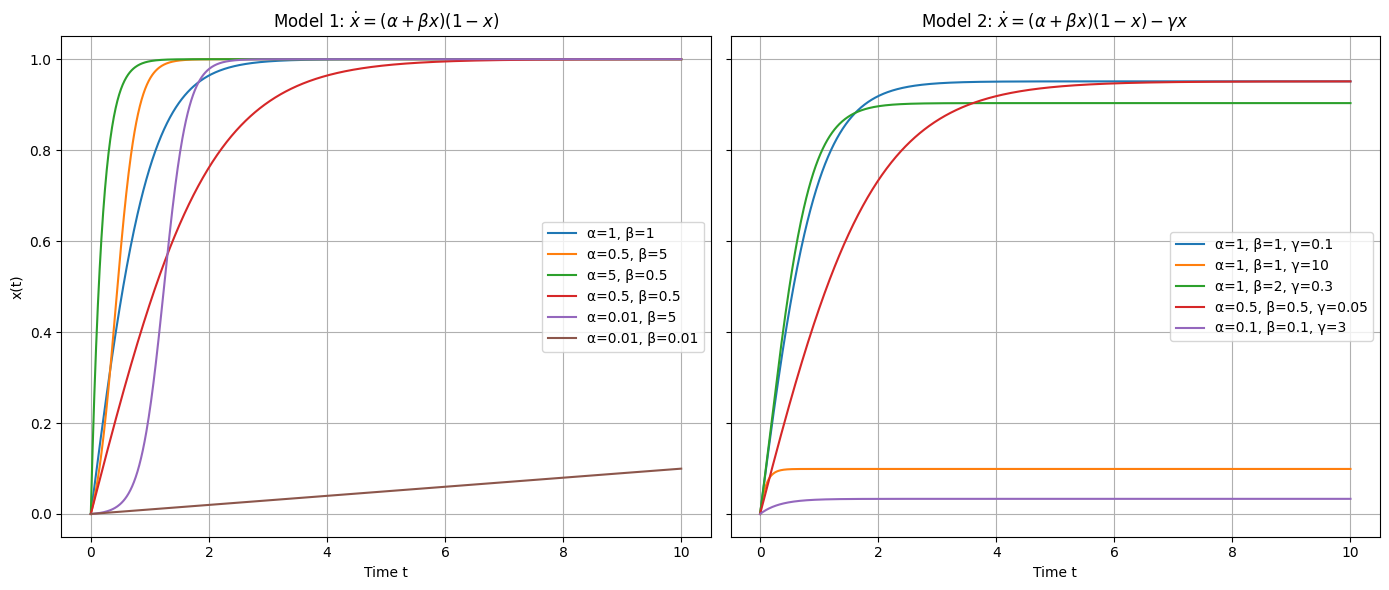

In [3]:

def model1_rhs(x, t,alpha, beta):
    return (alpha + beta * x) * (1 - x)

def model2_rhs(x, t, alpha, beta, gamma):
    return (alpha + beta * x) * (1 - x) - gamma * x

def rk4(f, x0, t, *params):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(x[i-1], t[i-1], *params)
        k2 = f(x[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt, *params)
        k3 = f(x[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt, *params)
        k4 = f(x[i-1] + dt * k3, t[i-1] + dt, *params)
        x[i] = x[i-1] + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x

# Time and initial condition
n = 1
t = np.linspace(0, 10, 1000)
x0 = np.zeros(n)
print("len :", len(x0))
# Parameter sets for comparison
params_model1 = [(1, 1), (0.5,5), (5, 0.5),(0.5, 0.5),(0.01, 5), (0.01,0.01)]
params_model2 = [(1, 1, 0.1), (1, 1, 10), (1, 2, 0.3), (0.5, 0.5, 0.05), (0.1,0.1,3)]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Model 1
for alpha, beta in params_model1:
    x = rk4(model1_rhs, x0, t, alpha, beta)
    axs[0].plot(t, x, label=f'α={alpha}, β={beta}')
axs[0].set_title('Model 1: $\dot{x} = (α + βx)(1 - x)$')
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('x(t)')
axs[0].grid(True)
axs[0].legend()

# Plot Model 2
for alpha, beta, gamma in params_model2:
    x = rk4(model2_rhs, x0, t, alpha, beta, gamma)
    axs[1].plot(t, x, label=f'α={alpha}, β={beta}, γ={gamma}')
axs[1].set_title('Model 2: $\dot{x} = (α + βx)(1 - x) - γx$')
axs[1].set_xlabel('Time t')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()



We now take into consideration the expanded model: model 3


In [4]:
# Model 3 dynamics
def model3_rhs(z, t, alpha, beta, gamma, delta):
    x, y_plus = z
    dz1 = alpha * y_plus + (beta * y_plus - gamma - delta) * x
    dz2 = - (alpha + beta * x) * y_plus + gamma * x
    return np.array([dz1, dz2])

# Interactive plot function
def plot_model3(alpha=1.0, beta=1.0, gamma=0.5, delta=0.3):
    t = np.linspace(0, 15, 1000)
    x0 = 0
    y_plus0 = 0.5
    z0 = np.array([x0, y_plus0])

    z = rk4(model3_rhs, z0, t, alpha, beta, gamma, delta)

    y_minus = 1 - z[:, 0] - z[:, 1]

    plt.figure(figsize=(10, 6))
    plt.plot(t, z[:, 0], label='$x(t)$')
    plt.plot(t, z[:, 1], label='$y_+(t)$')
    plt.plot(t, y_minus, label='$y_-(t)$')
    plt.title(f'Model 3 Dynamics: α={alpha}, β={beta}, γ={gamma}, δ={delta}')
    plt.xlabel('Time $t$')
    plt.ylabel('State values')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create sliders and interactive output
interact(
    plot_model3,
    alpha=FloatSlider(min=0, max=10, step=0.1, value=1.0, description='α'),
    beta=FloatSlider(min=0, max=10, step=0.1, value=1.0, description='β'),
    gamma=FloatSlider(min=0, max=10, step=0.1, value=0.5, description='γ'),
    delta=FloatSlider(min=0, max=10, step=0.1, value=0.3, description='δ')
)


interactive(children=(FloatSlider(value=1.0, description='α', max=10.0), FloatSlider(value=1.0, description='β…

<function __main__.plot_model3(alpha=1.0, beta=1.0, gamma=0.5, delta=0.3)>

## Things to explore:

First plot: explore what happens when different terms prevail (shape will change if beta is very big)

Second plot: maybe we can make the thing decay to zero if gamma is big enough. 

## We now switch to analyzing the multi-service case:


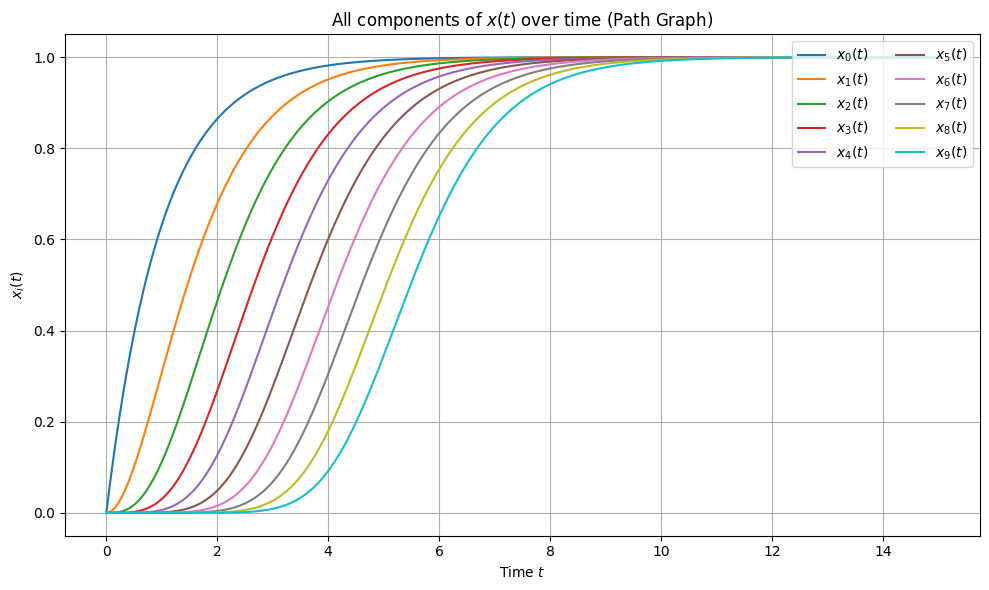

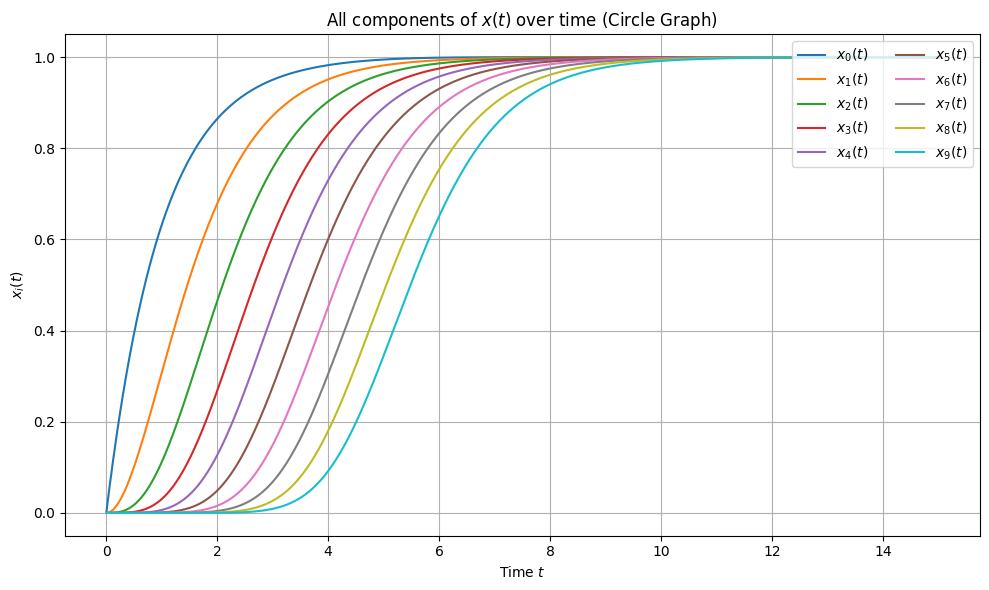

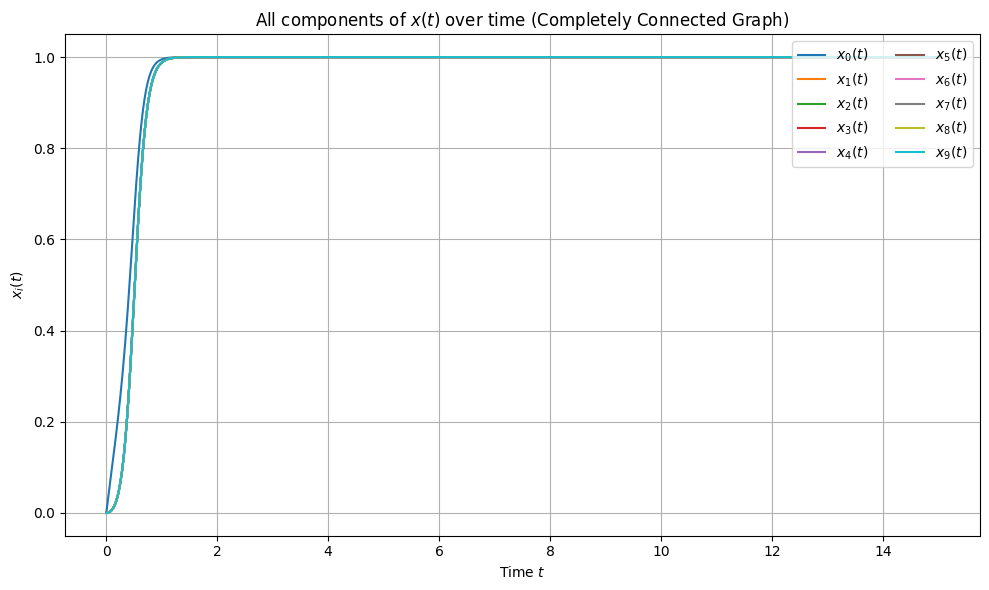

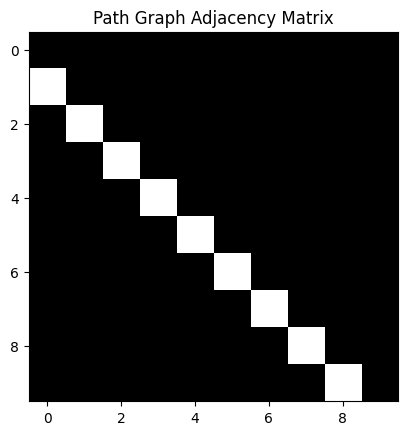

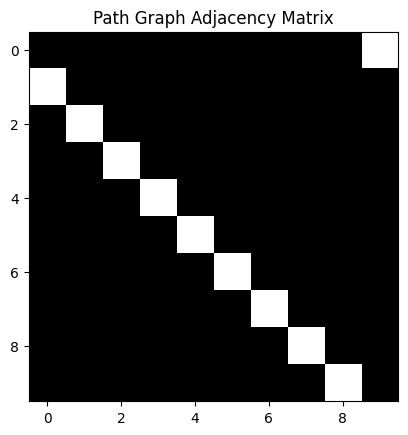

In [5]:
def path_graph_adjacency(n):
    """Adjacency matrix for a path graph a) """
    A = np.zeros((n, n), dtype=int)
    for i in range(n - 1):
        A[i + 1, i] = 1
    return A

def circle_graph_adjacency(n):
    """Adjacency matrix for a cycle graph C_n"""
    A = path_graph_adjacency(n)
    A[0, n - 1] = 1
    return A

def complete_graph_adjacency(n):
    """Adjacency matrix for a complete graph K_n without self-loops"""
    A = np.ones((n, n), dtype=int)
    np.fill_diagonal(A, 0)
    return A

n = 10

B_path = path_graph_adjacency(n)
B_circle = circle_graph_adjacency(n)
B_cc = complete_graph_adjacency(n)
#print(B_path)
#print(B_circle)
#print(B_cc)

alpha = np.zeros(n)
alpha[0] = 1
#print(alpha)

def model1_vector(x, t, alpha, beta):
    return np.diag(np.ones(len(x)) -  x) @(alpha +beta @ x) 

def model2_vector(x,t,alpha, beta, gamma):
    return np.diag(np.ones(len(x)) -  x) @(alpha +beta @ x) - gamma*x


t = np.linspace(0, 15, 1000)
x0 = np.zeros(n)
x_path = rk4(model1_vector, x0, t, alpha, B_path)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_path.shape[1]):
    ax.plot(t, x_path[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Path Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

x_circle = rk4(model1_vector, x0, t, alpha, B_circle)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_circle.shape[1]):
    ax.plot(t, x_circle[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Circle Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

x_cc = rk4(model1_vector, x0, t, alpha, B_cc)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_cc.shape[1]):
    ax.plot(t, x_cc[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Completely Connected Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

plt.imshow(B_path, cmap='gray')
plt.title("Path Graph Adjacency Matrix")
plt.show()
plt.imshow(B_circle, cmap='gray')
plt.title("Path Graph Adjacency Matrix")
plt.show()

## Now lets compute some statistics! :)

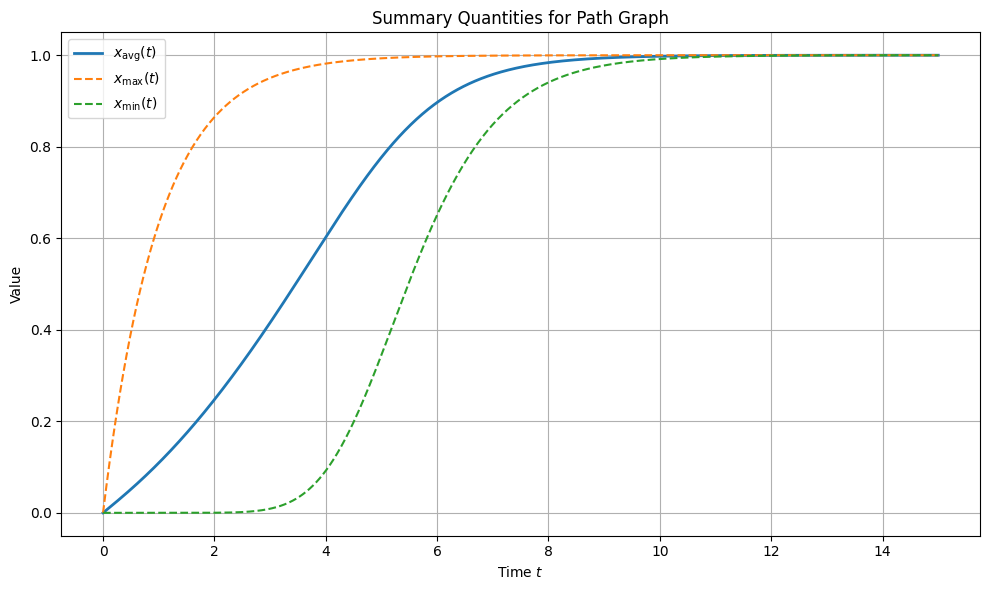

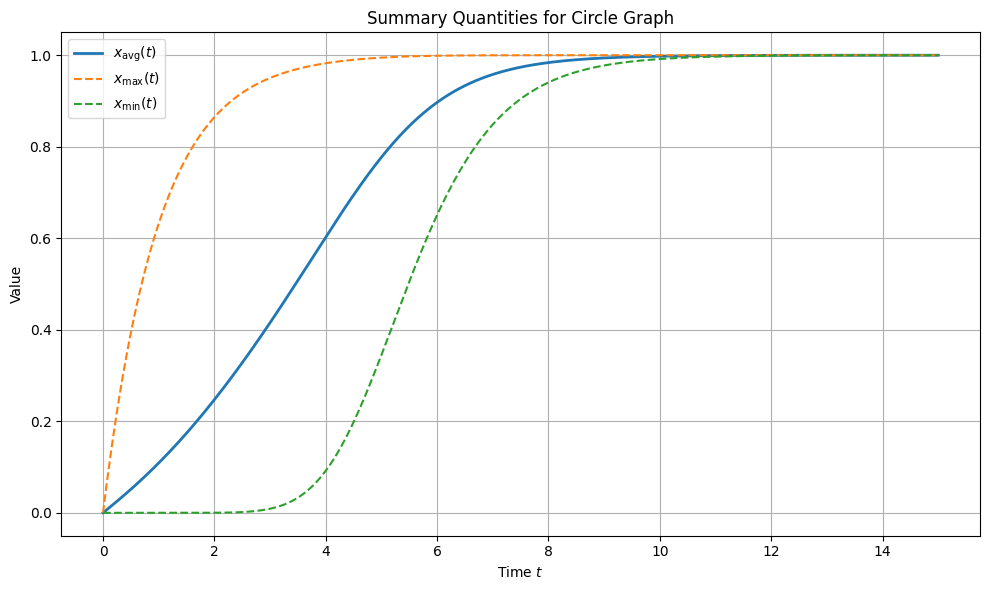

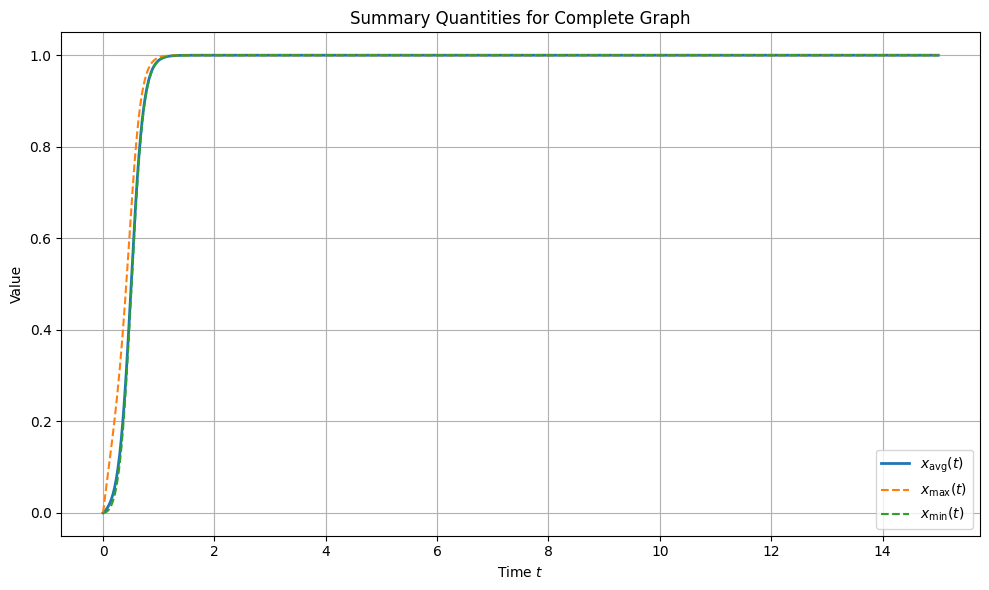

/tmp/ipykernel_230601/410835899.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')


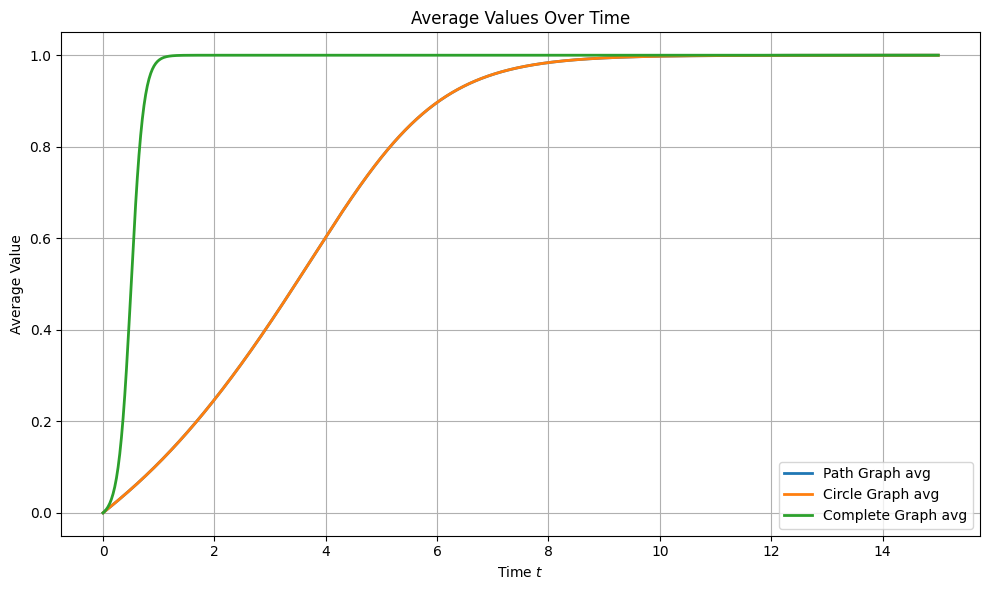

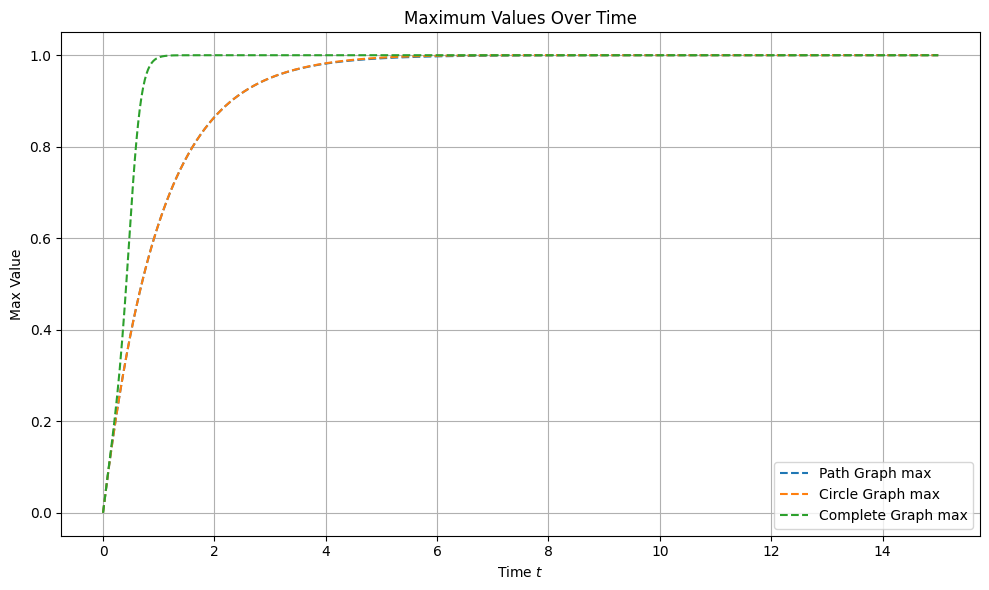

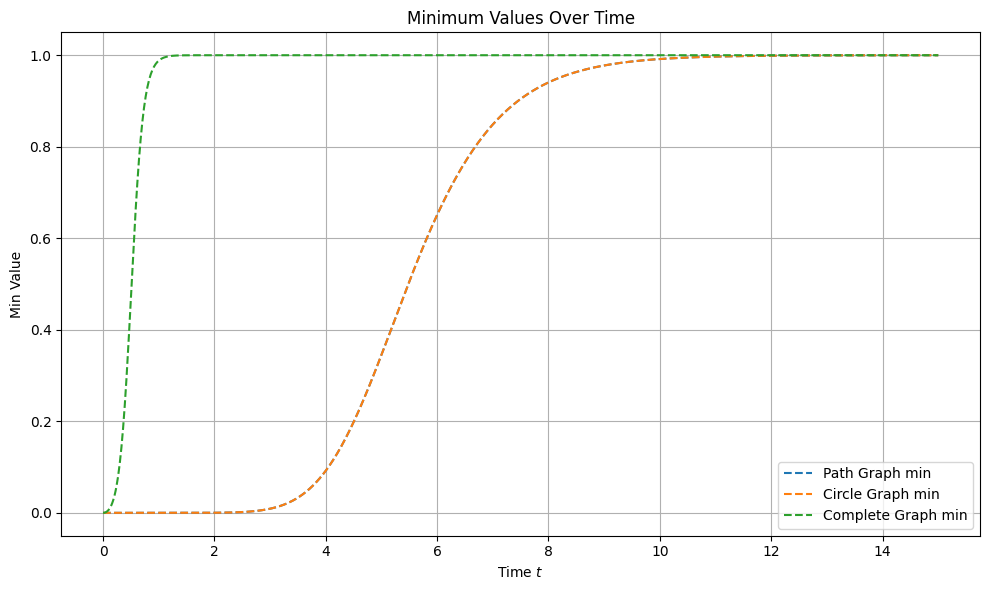

In [6]:
def plot_xavg_xmax_xmin(t, x, graph_name):
    x_avg = np.mean(x, axis=1)
    x_max = np.max(x, axis=1)
    x_min = np.min(x, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(t, x_avg, label=r'$x_{\mathrm{avg}}(t)$', linewidth=2)
    plt.plot(t, x_max, label=r'$x_{\mathrm{max}}(t)$', linestyle='--')
    plt.plot(t, x_min, label=r'$x_{\mathrm{min}}(t)$', linestyle='--')
    
    plt.title(f'Summary Quantities for {graph_name}')
    plt.xlabel('Time $t$')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_xavg_xmax_xmin(t, x_path, 'Path Graph')
plot_xavg_xmax_xmin(t, x_circle, 'Circle Graph')
plot_xavg_xmax_xmin(t, x_cc, 'Complete Graph')

def plot_separate_stats(t, data_list):
    """
    Plots separate figures for avg, max, and min of multiple graphs.

    Parameters:
    - t: 1D array-like, time vector
    - data_list: list of tuples (x, graph_name)
      x is 2D array where axis=1 is sample axis for stats calculation.
    """
    colors = plt.cm.get_cmap('tab10')

    # Prepare containers for stats
    x_avgs = []
    x_maxs = []
    x_mins = []
    labels = []

    for i, (x, name) in enumerate(data_list):
        x_avgs.append(np.mean(x, axis=1))
        x_maxs.append(np.max(x, axis=1))
        x_mins.append(np.min(x, axis=1))
        labels.append(name)

    # Plot averages
    plt.figure(figsize=(10, 6))
    for i, avg in enumerate(x_avgs):
        plt.plot(t, avg, label=f'{labels[i]} avg', color=colors(i), linewidth=2)
    plt.title('Average Values Over Time')
    plt.xlabel('Time $t$')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot max values
    plt.figure(figsize=(10, 6))
    for i, mx in enumerate(x_maxs):
        plt.plot(t, mx, label=f'{labels[i]} max', color=colors(i), linestyle='--')
    plt.title('Maximum Values Over Time')
    plt.xlabel('Time $t$')
    plt.ylabel('Max Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot min values
    plt.figure(figsize=(10, 6))
    for i, mn in enumerate(x_mins):
        plt.plot(t, mn, label=f'{labels[i]} min', color=colors(i), linestyle='--')
    plt.title('Minimum Values Over Time')
    plt.xlabel('Time $t$')
    plt.ylabel('Min Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_separate_stats(t, [(x_path, 'Path Graph'), (x_circle, 'Circle Graph'), (x_cc, 'Complete Graph')])

## We now want to see how the settling time, computed as the time where we reach 95% of the steady state value, varies with the number of nodes.



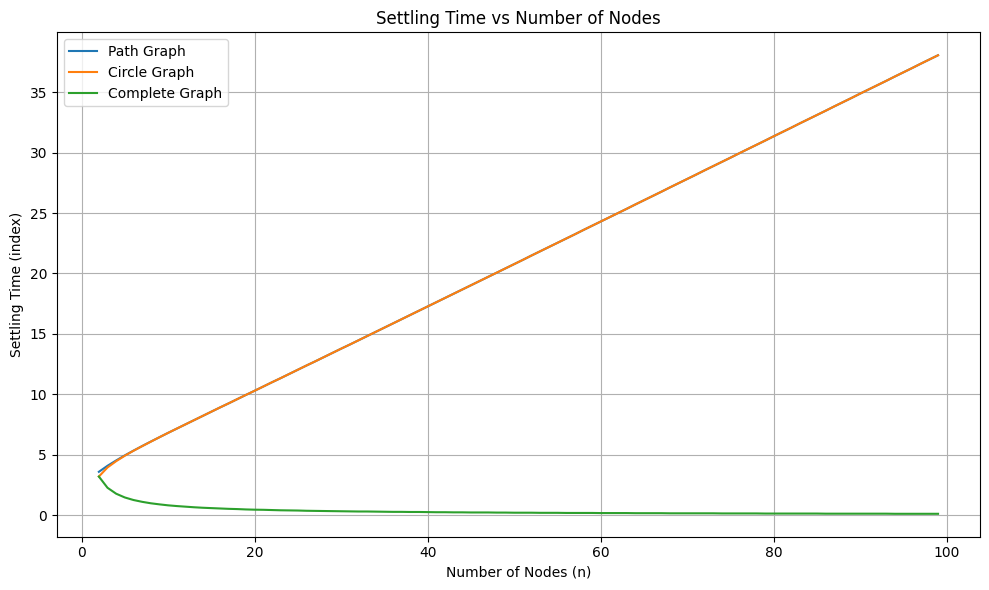

In [7]:
list_of_n = np.arange(2, 100)  
t = np.linspace(0, 100, 10000)
t_settling_traj_path = []
t_settling_traj_circle = []
t_settling_traj_cc = []
def compute_t_settling(x):
    """ Given a trajectory x, computes it's settling time as the time where the avg reaches 95% of the value"""
    x_avg = np.mean(x, axis=1)
    for i, elem in enumerate(x_avg):
        if elem >= 0.95:
            return t[i]
    print("Need to increase time, could not find settling time") 
    return -1
for n in list_of_n:
    x0 = np.zeros(n)
    B_path = path_graph_adjacency(n)
    B_circle = circle_graph_adjacency(n)
    B_cc = complete_graph_adjacency(n)
    alpha = np.zeros(n)
    alpha[0] = 1
    x_cc = rk4(model1_vector, x0, t, alpha, B_cc)  
    x_path = rk4(model1_vector, x0, t, alpha, B_path)  
    x_circle = rk4(model1_vector, x0, t, alpha, B_circle)
    t_settling_traj_cc.append(compute_t_settling(x_cc))
    t_settling_traj_path.append(compute_t_settling(x_path))
    t_settling_traj_circle.append(compute_t_settling(x_circle))

# Now plot the settling times vs n
plt.figure(figsize=(10, 6))
plt.plot(list_of_n, t_settling_traj_path, label='Path Graph')
plt.plot(list_of_n, t_settling_traj_circle, label='Circle Graph')
plt.plot(list_of_n, t_settling_traj_cc, label='Complete Graph')

plt.title('Settling Time vs Number of Nodes')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Settling Time (index)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()









## Lets now look at the model 2:

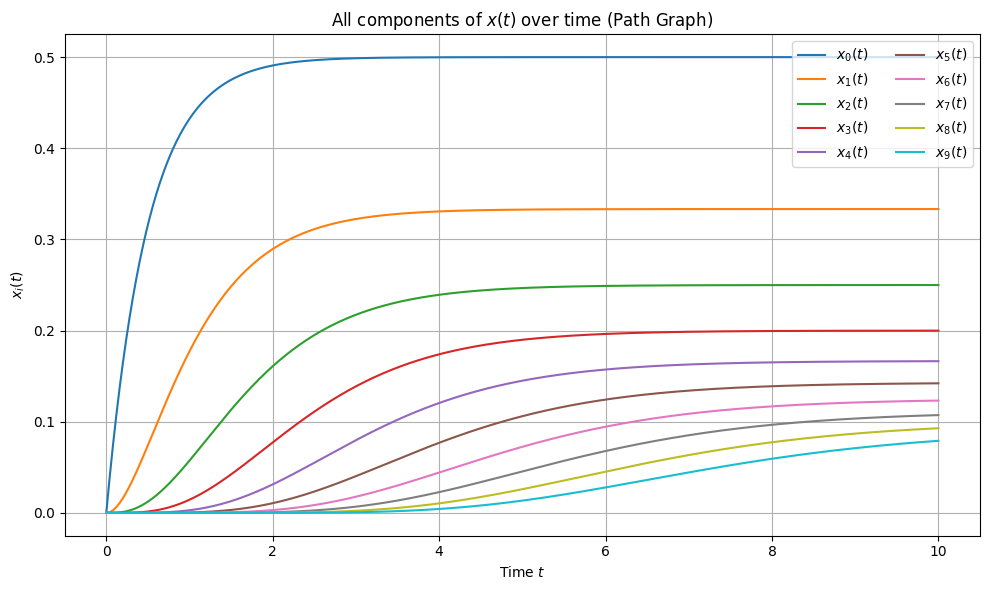

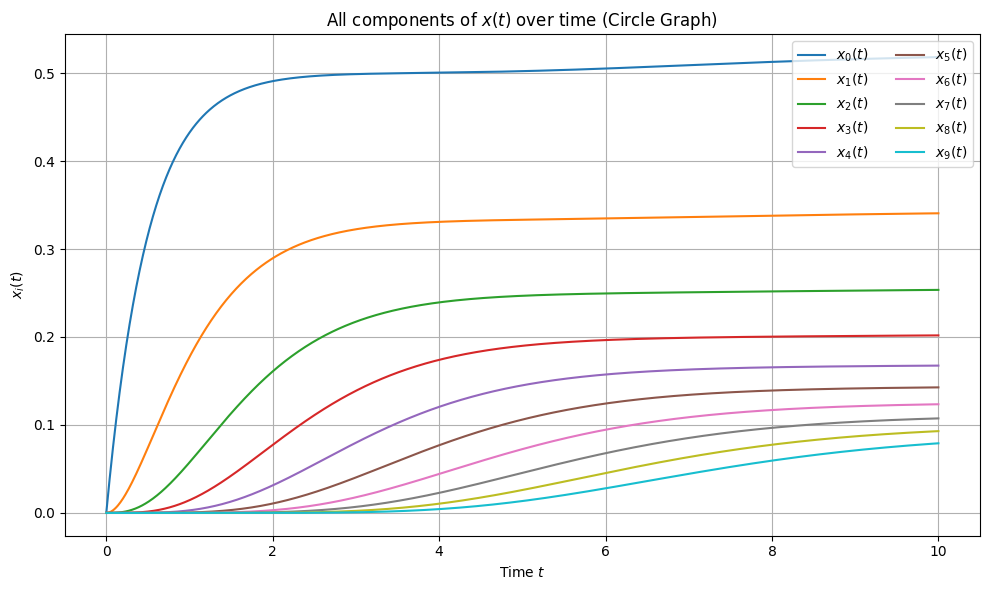

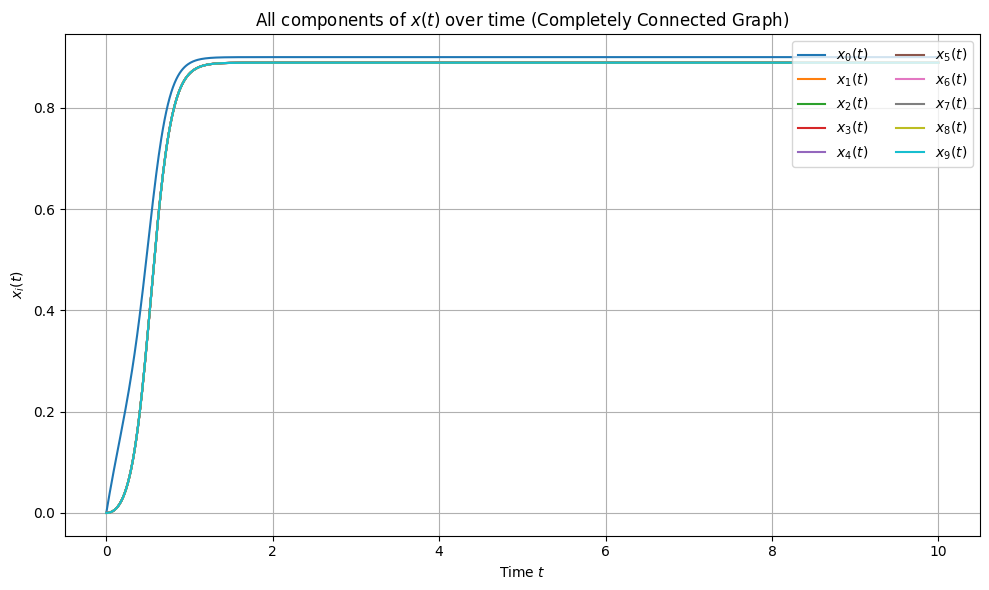

In [8]:
## Lets now look at the model 2:
gamma = 1

n = 10

B_path = path_graph_adjacency(n)
B_circle = circle_graph_adjacency(n)
B_cc = complete_graph_adjacency(n)
#print(B_path)
#print(B_circle)
#print(B_cc)

alpha = np.zeros(n)
alpha[0] = 1
#print(alpha)

def model2_vector(x, t, alpha, beta, gamma):
    return np.diag(np.ones(len(x)) -  x) @(alpha +beta @ x) - gamma*x 

t = np.linspace(0, 10, 1000)
x0 = np.zeros(n)
x_path = rk4(model2_vector, x0, t, alpha, B_path, gamma)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_path.shape[1]):
    ax.plot(t, x_path[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Path Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

x_circle = rk4(model2_vector, x0, t, alpha, B_circle, gamma)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_circle.shape[1]):
    ax.plot(t, x_circle[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Circle Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

x_cc = rk4(model2_vector, x0, t, alpha, B_cc, gamma)  
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(x_cc.shape[1]):
    ax.plot(t, x_cc[:, i], label=f'$x_{i}(t)$')

ax.set_title('All components of $x(t)$ over time (Completely Connected Graph)')
ax.set_xlabel('Time $t$')
ax.set_ylabel('$x_i(t)$')
ax.grid(True)
ax.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()




Now we plot some thing else: xmax xmin xavg yeah 

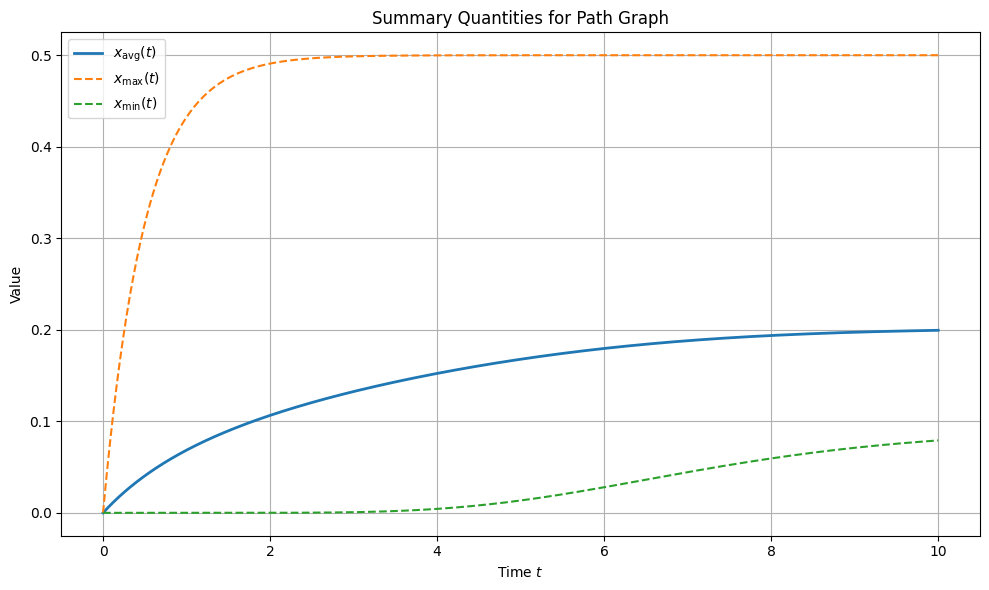

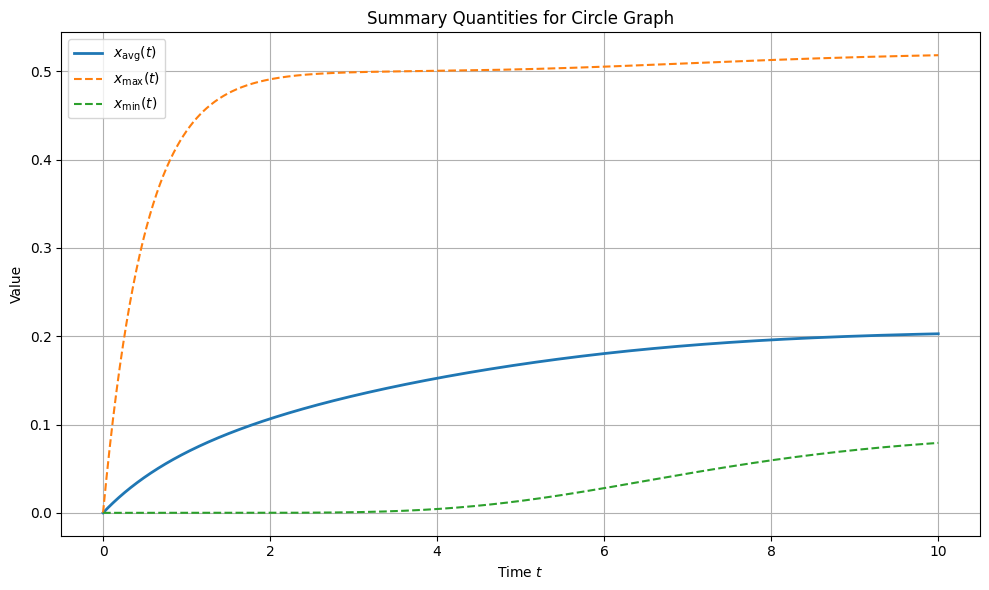

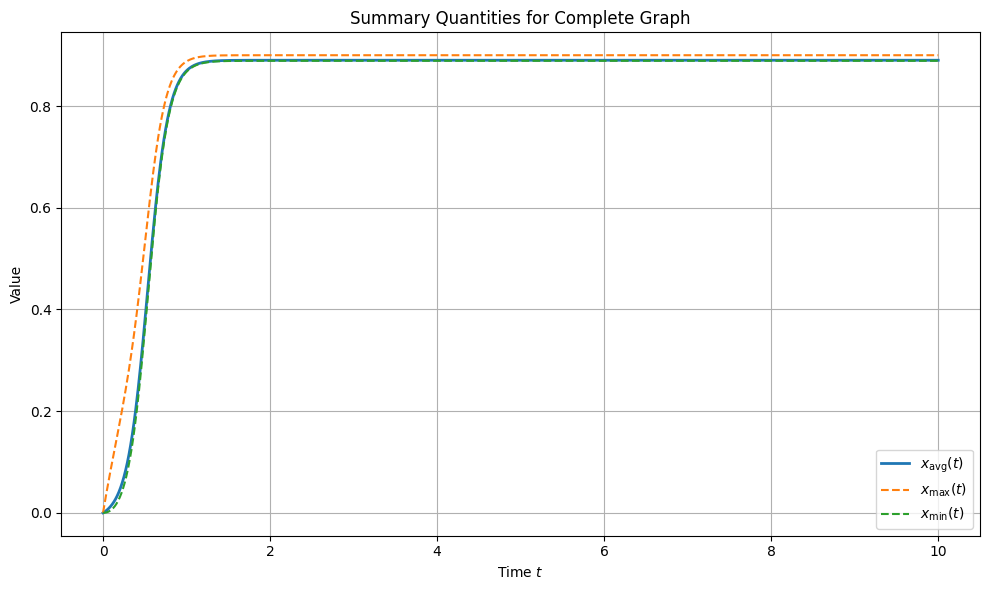

/tmp/ipykernel_230601/410835899.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')


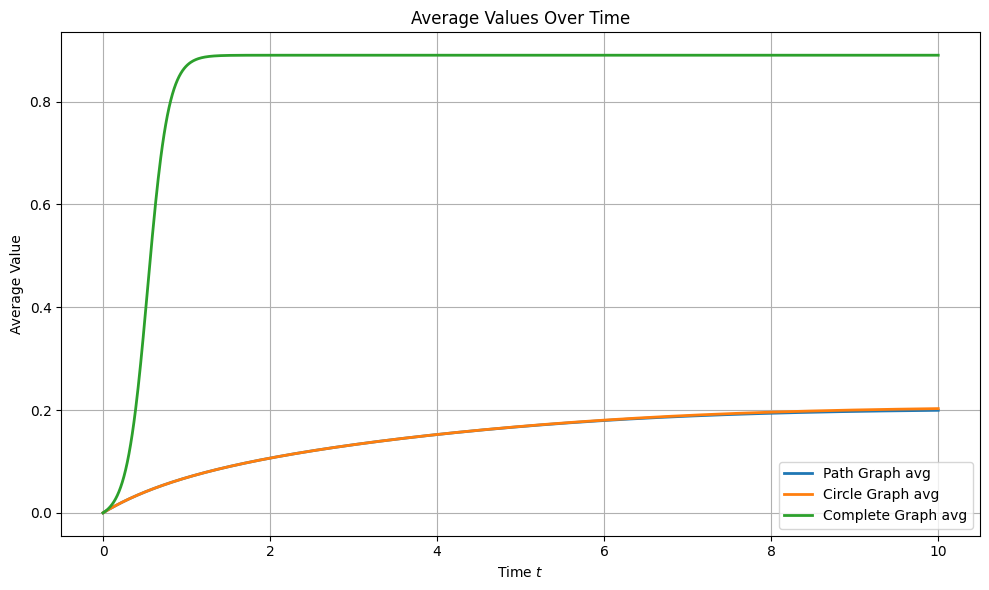

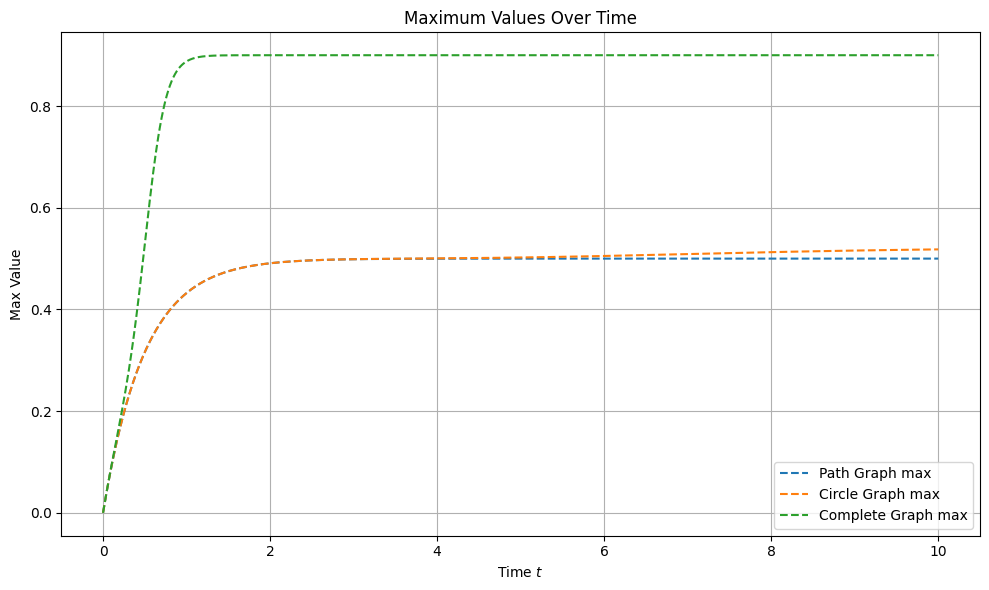

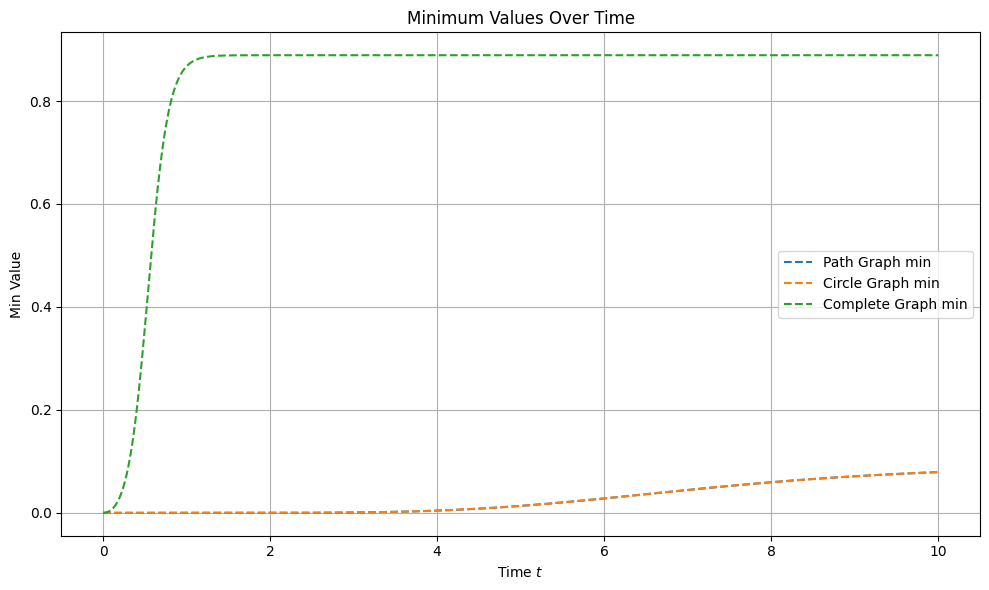

In [9]:
plot_xavg_xmax_xmin(t, x_path, 'Path Graph')
plot_xavg_xmax_xmin(t, x_circle, 'Circle Graph')
plot_xavg_xmax_xmin(t, x_cc, 'Complete Graph')

plot_separate_stats(t, [(x_path, 'Path Graph'), (x_circle, 'Circle Graph'), (x_cc, 'Complete Graph')])

And now, we plot the asymptotic values as the number of nodes in the graphs change, yayyyy

(10000, 2)
(10000, 3)
(10000, 4)
(10000, 5)
(10000, 6)
(10000, 7)
(10000, 8)
(10000, 9)
(10000, 10)
(10000, 11)
(10000, 12)
(10000, 13)
(10000, 14)
(10000, 15)
(10000, 16)
(10000, 17)
(10000, 18)
(10000, 19)
(10000, 20)
(10000, 21)
(10000, 22)
(10000, 23)
(10000, 24)
(10000, 25)
(10000, 26)
(10000, 27)
(10000, 28)
(10000, 29)
(10000, 30)
(10000, 31)
(10000, 32)
(10000, 33)
(10000, 34)
(10000, 35)
(10000, 36)
(10000, 37)
(10000, 38)
(10000, 39)
(10000, 40)
(10000, 41)
(10000, 42)
(10000, 43)
(10000, 44)
(10000, 45)
(10000, 46)
(10000, 47)
(10000, 48)
(10000, 49)
(10000, 50)
(10000, 51)
(10000, 52)
(10000, 53)
(10000, 54)
(10000, 55)
(10000, 56)
(10000, 57)
(10000, 58)
(10000, 59)
(10000, 60)
(10000, 61)
(10000, 62)
(10000, 63)
(10000, 64)
(10000, 65)
(10000, 66)
(10000, 67)
(10000, 68)
(10000, 69)
(10000, 70)
(10000, 71)
(10000, 72)
(10000, 73)
(10000, 74)
(10000, 75)
(10000, 76)
(10000, 77)
(10000, 78)
(10000, 79)
(10000, 80)
(10000, 81)
(10000, 82)
(10000, 83)
(10000, 84)
(10000, 85)


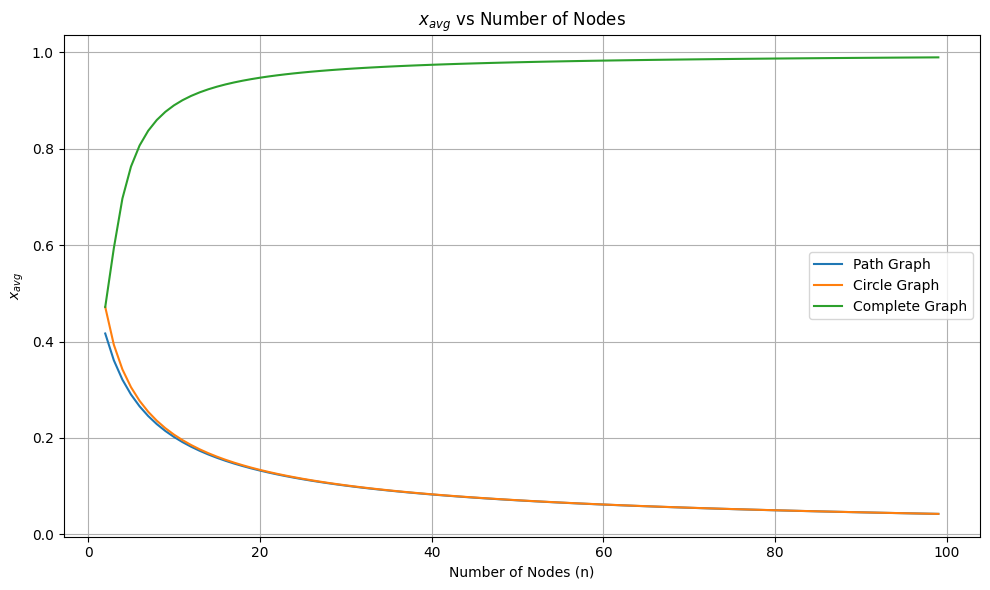

In [10]:
# Need to compute the avg as n varies
list_of_n = np.arange(2, 100)  
t = np.linspace(0, 100, 10000)
x_avg_traj_path = []
x_avg_traj_circle = []
x_avg_traj_cc = []
    
for n in list_of_n:
    x0 = np.zeros(n)
    B_path = path_graph_adjacency(n)
    B_circle = circle_graph_adjacency(n)
    B_cc = complete_graph_adjacency(n)
    alpha = np.zeros(n)
    alpha[0] = 1
    x_cc = rk4(model2_vector, x0, t, alpha, B_cc, gamma)  
    x_path = rk4(model2_vector, x0, t, alpha, B_path, gamma)  
    x_circle = rk4(model2_vector, x0, t, alpha, B_circle, gamma)   
    print(x_cc.shape)
    x_avg_traj_cc.append(np.mean(x_cc[-1, :]))
    x_avg_traj_path.append(np.mean(x_path[-1,:]))
    x_avg_traj_circle.append(np.mean(x_circle[-1,:]))

# Now plot the settling times vs n
plt.figure(figsize=(10, 6))
plt.plot(list_of_n, x_avg_traj_path, label='Path Graph')
plt.plot(list_of_n, x_avg_traj_circle, label='Circle Graph')
plt.plot(list_of_n, x_avg_traj_cc, label='Complete Graph')

plt.title(r'$x_{avg}$ vs Number of Nodes')
plt.xlabel('Number of Nodes (n)')
plt.ylabel(r'$x_{avg}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(10000, 2)
(10000, 3)
(10000, 4)
(10000, 5)
(10000, 6)
(10000, 7)
(10000, 8)
(10000, 9)
(10000, 10)
(10000, 11)
(10000, 12)
(10000, 13)
(10000, 14)
(10000, 15)
(10000, 16)
(10000, 17)
(10000, 18)
(10000, 19)
(10000, 20)
(10000, 21)
(10000, 22)
(10000, 23)
(10000, 24)
(10000, 25)
(10000, 26)
(10000, 27)
(10000, 28)
(10000, 29)
(10000, 30)
(10000, 31)
(10000, 32)
(10000, 33)
(10000, 34)
(10000, 35)
(10000, 36)
(10000, 37)
(10000, 38)
(10000, 39)
(10000, 40)
(10000, 41)
(10000, 42)
(10000, 43)
(10000, 44)
(10000, 45)
(10000, 46)
(10000, 47)
(10000, 48)
(10000, 49)
(10000, 50)
(10000, 51)
(10000, 52)
(10000, 53)
(10000, 54)
(10000, 55)
(10000, 56)
(10000, 57)
(10000, 58)
(10000, 59)
(10000, 60)
(10000, 61)
(10000, 62)
(10000, 63)
(10000, 64)
(10000, 65)
(10000, 66)
(10000, 67)
(10000, 68)
(10000, 69)
(10000, 70)
(10000, 71)
(10000, 72)
(10000, 73)
(10000, 74)
(10000, 75)
(10000, 76)
(10000, 77)
(10000, 78)
(10000, 79)
(10000, 80)
(10000, 81)
(10000, 82)
(10000, 83)
(10000, 84)
(10000, 85)


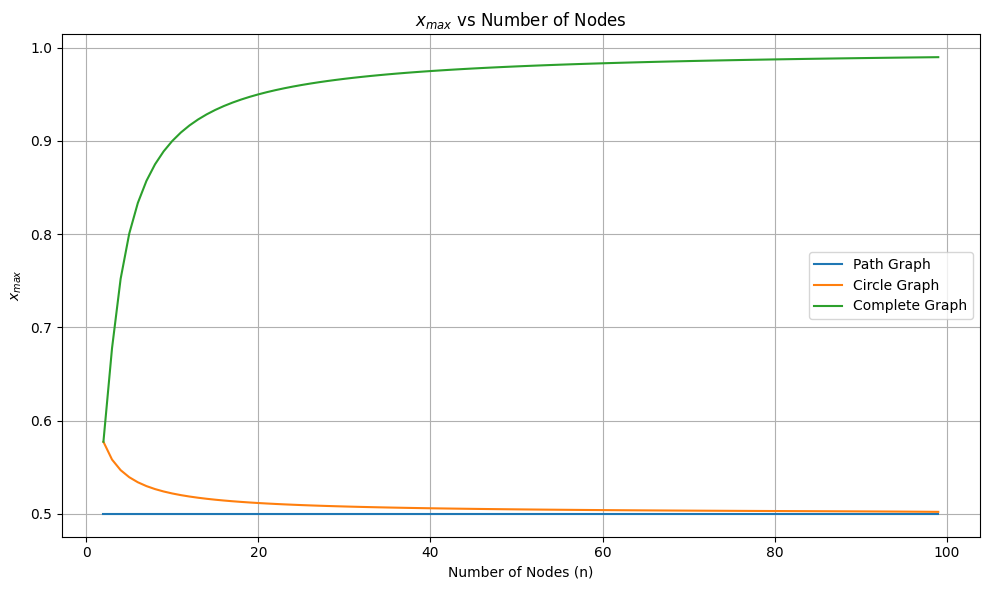

In [20]:
# Need to compute the avg as n varies
list_of_n = np.arange(2, 100)  
t = np.linspace(0, 100, 10000)
x_max_traj_path = []
x_max_traj_circle = []
x_max_traj_cc = []
    
for n in list_of_n:
    x0 = np.zeros(n)
    B_path = path_graph_adjacency(n)
    B_circle = circle_graph_adjacency(n)
    B_cc = complete_graph_adjacency(n)
    alpha = np.zeros(n)
    alpha[0] = 1
    x_cc = rk4(model2_vector, x0, t, alpha, B_cc, gamma)  
    x_path = rk4(model2_vector, x0, t, alpha, B_path, gamma)  
    x_circle = rk4(model2_vector, x0, t, alpha, B_circle, gamma)   
    print(x_cc.shape)
    x_max_traj_cc.append(np.max(x_cc))
    x_max_traj_path.append(np.max(x_path))
    x_max_traj_circle.append(np.max(x_circle))

# Now plot the settling times vs n
plt.figure(figsize=(10, 6))
plt.plot(list_of_n, x_max_traj_path, label='Path Graph')
plt.plot(list_of_n, x_max_traj_circle, label='Circle Graph')
plt.plot(list_of_n, x_max_traj_cc, label='Complete Graph')

plt.title(r'$x_{max}$ vs Number of Nodes')
plt.xlabel('Number of Nodes (n)')
plt.ylabel(r'$x_{max}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()